In [1]:
import os

import matplotlib
from matplotlib import pyplot as plt
from matplotlib.ticker import FuncFormatter

from QHyper.problems.algorithms.solver_utils import WorkflowSchedulingSolverDecorator, \
    DecomposedWorkflowSchedulingSolver
from QHyper.problems.algorithms.workflow_decomposition import SeriesParallelSplitEnhanced, SeriesParallelSplitFinal
from QHyper.problems.workflow_scheduling import Workflow, WorkflowSchedulingOneHot
from QHyper.solvers import Gurobi, solver_from_config
import pandas as pd

In [10]:
tasks_file = "/home/marcin/Programming/pegasus-instances/epigenomics/chameleon-cloud/epigenomics-chameleon-hep-3seq-100k-001.json"
machines_file = "../workflows_data/machines/linear_smaller_diff.json"
workflow = Workflow(tasks_file, machines_file, 100000)
print(workflow.critical_path_value)

3770.2907483428567


In [11]:
def deadline_as_cpv(tasks_file, machines_file):
    workflow = Workflow(tasks_file, machines_file, 100000)
    return int(workflow.critical_path_value)

In [12]:
print(deadline_as_cpv(tasks_file, machines_file))

3770


In [3]:
divisions = [0.75, 0.5, 0.25, 0.15, 0.1, 0.05, 0.02, 0.01]
mss = [int(d * 233) for d in divisions]
print(mss)

[174, 116, 58, 34, 23, 11, 4, 2]


In [13]:
def get_decomposed_solver(tasks_file: str, machines_file: str, deadline: int, max_graph_size: int):
    workflow = Workflow(tasks_file, machines_file, deadline)
    division = SeriesParallelSplitFinal().decompose(workflow, max_graph_size)
    problems = map(lambda w: WorkflowSchedulingOneHot(w), division.workflows)
    solvers = map(lambda p: WorkflowSchedulingSolverDecorator(Gurobi(p)), problems)
    return DecomposedWorkflowSchedulingSolver(list(solvers), division)

In [14]:
solver = get_decomposed_solver(tasks_file, machines_file, 3770, 58)

In [15]:
solver.solve()

Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (linux64)

CPU model: Intel(R) Core(TM) i7-7700HQ CPU @ 2.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 49 rows, 200 columns and 515 nonzeros
Model fingerprint: 0x868d4916
Variable types: 0 continuous, 200 integer (200 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+03]
  Objective range  [3e+00, 4e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+03]
Found heuristic solution: objective 22658.309760
Presolve removed 43 rows and 183 columns
Presolve time: 0.00s
Presolved: 6 rows, 17 columns, 32 nonzeros
Found heuristic solution: objective 16991.045760
Variable types: 0 continuous, 17 integer (17 binary)

Root relaxation: objective 1.696493e+04, 1 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd

WorkflowSchedule(cost=133595.46623999995, time=3692.392704, deadline=3770, machine_assignment={'filterContams_filterContams_HEP2_MSP1_Digests_s_1_sequence_9_ID0000069': 'Machine1', 'fast2bfq_fast2bfq_HEP2_MSP1_Digests_s_1_sequence_5_ID0000006': 'Machine1', 'mapMerge_mapMerge_HEP2_MSP1_Digests_ID0000117': 'Machine3', 'fast2bfq_fast2bfq_HEP2_MSP1_Digests_s_1_sequence_2_ID0000003': 'Machine1', 'filterContams_filterContams_HEP2_MSP1_Digests_s_1_sequence_5_ID0000065': 'Machine1', 'fast2bfq_fast2bfq_HEP2_MSP1_Digests_s_1_sequence_3_ID0000004': 'Machine1', 'fast2bfq_fast2bfq_HEP2_MSP1_Digests_s_1_sequence_6_ID0000007': 'Machine1', 'sol2sanger_sol2sanger_HEP2_MSP1_Digests_s_1_sequence_6_ID0000183': 'Machine1', 'sol2sanger_sol2sanger_HEP2_MSP1_Digests_s_1_sequence_4_ID0000181': 'Machine1', 'map_map_HEP2_MSP1_Digests_s_1_sequence_5_ID0000125': 'Machine1', 'fast2bfq_fast2bfq_HEP2_MSP1_Digests_s_1_sequence_9_ID0000010': 'Machine1', 'map_map_HEP2_MSP1_Digests_s_1_sequence_7_ID0000127': 'Machine1', 

In [27]:
def get_solver(tasks_file: str, machines_file: str, deadline):
    solver_config = {
        "problem": {
            "type": "workflow_scheduling",
            "encoding": "one-hot",
            "tasks_file": tasks_file,
            "machines_file": machines_file,
            "deadline": deadline,
        },
        "solver": {
            "type": "gurobi",
        }
    }

    return WorkflowSchedulingSolverDecorator(solver_from_config(solver_config))

In [31]:
get_solver(tasks_file, machines_file, 24081.23).solve()

Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (linux64)

CPU model: Intel(R) Core(TM) i7-7700HQ CPU @ 2.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 164 rows, 420 columns and 2020 nonzeros
Model fingerprint: 0xdabdad09
Variable types: 0 continuous, 420 integer (420 binary)
Coefficient statistics:
  Matrix range     [2e-01, 3e+04]
  Objective range  [4e-01, 7e+04]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+04]
Found heuristic solution: objective 1072912.2678
Presolve removed 164 rows and 420 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 8 available processors)

Solution count 2: 837251 1.07291e+06 

Optimal solution found (tolerance 1.00e-04)
Best objective 8.372512380024e+05, best bound 8.372512380024e+05, gap 0.0000%


WorkflowSchedule(cost=837251.2380024, time=24077.39805257143, deadline=24081.23, machine_assignment={'bowtie2-build_ID0000001': 'Machine1', 'fasterq-dump_ID0000002': 'Machine1', 'bowtie2_ID0000003': 'Machine1', 'fasterq-dump_ID0000004': 'Machine1', 'bowtie2_ID0000005': 'Machine1', 'fasterq-dump_ID0000006': 'Machine1', 'bowtie2_ID0000007': 'Machine1', 'fasterq-dump_ID0000008': 'Machine1', 'bowtie2_ID0000009': 'Machine1', 'fasterq-dump_ID0000010': 'Machine1', 'bowtie2_ID0000011': 'Machine1', 'fasterq-dump_ID0000012': 'Machine1', 'bowtie2_ID0000013': 'Machine1', 'fasterq-dump_ID0000014': 'Machine1', 'bowtie2_ID0000015': 'Machine1', 'fasterq-dump_ID0000016': 'Machine1', 'bowtie2_ID0000017': 'Machine1', 'fasterq-dump_ID0000018': 'Machine1', 'bowtie2_ID0000019': 'Machine1', 'fasterq-dump_ID0000020': 'Machine2', 'bowtie2_ID0000021': 'Machine1', 'fasterq-dump_ID0000022': 'Machine1', 'bowtie2_ID0000023': 'Machine1', 'fasterq-dump_ID0000024': 'Machine1', 'bowtie2_ID0000025': 'Machine1', 'fasterq

In [2]:
cpv_df = pd.read_csv(os.path.join("cpv_impact", "cpv_df.csv"))

In [28]:
cpv_df.corr()

,Unnamed: 0,cpv_increase,cost_increase
Unnamed: 0,1.000000,0.958428,-0.516719
cpv_increase,0.958428,1.000000,-0.430480
cost_increase,-0.516719,-0.430480,1.000000


In [3]:
def plot_for_family(cpv_df, save_path: str = None):
    fig, ax = plt.subplots(1, 1, figsize=(12, 6))
    
    ax.scatter((cpv_df["cpv_increase"] - 1) * 100, (cpv_df["cost_increase"] - 1) * 100)
    
    ax.set_xticklabels(ax.get_xticks(), fontsize=18)
    ax.set_yticklabels(ax.get_yticks(), fontsize=18)
    ax.xaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.1f}'))
    ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.1f}'))
    ax.set_xlabel('critical path value increase [%]', fontsize=20)
    ax.set_ylabel('cost increase [%]', fontsize=20)
    # plt.grid(False)
    # ax.set_title(f'Influence of the max subgraph size on the schedule cost for {family} workflows', fontsize=15)
    
    # plt.legend(fontsize=20)
    plt.show()

    if save_path:
        fig.savefig(save_path, bbox_inches='tight')

In [4]:
matplotlib.rc_file_defaults()

/tmp/ipykernel_41674/1944244777.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontsize=18)
/tmp/ipykernel_41674/1944244777.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontsize=18)


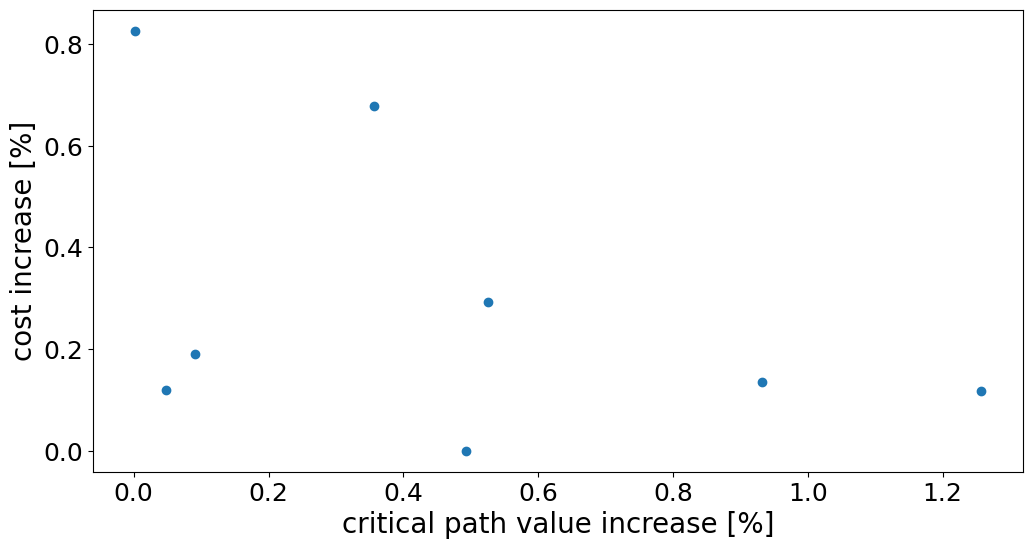

In [5]:
plot_for_family(cpv_df, os.path.join("cpv_impact", "cpv_impact.png"))

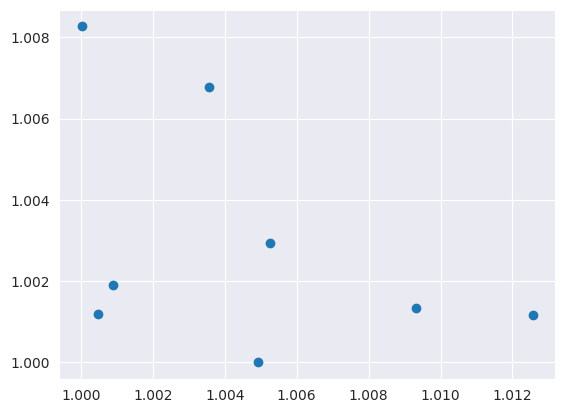

In [7]:
plt.scatter(cpv_df["cpv_increase"], cpv_df["cost_increase"])